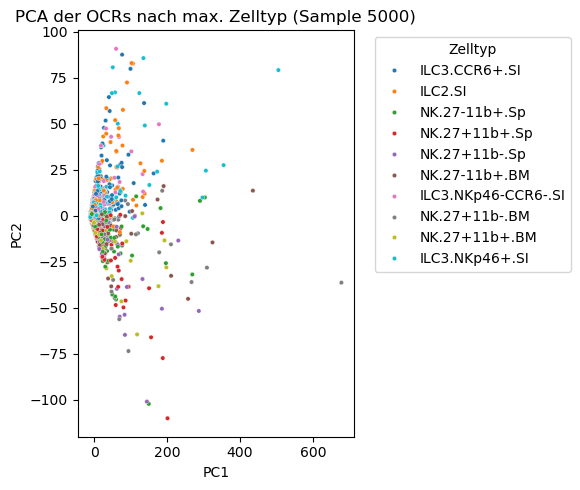

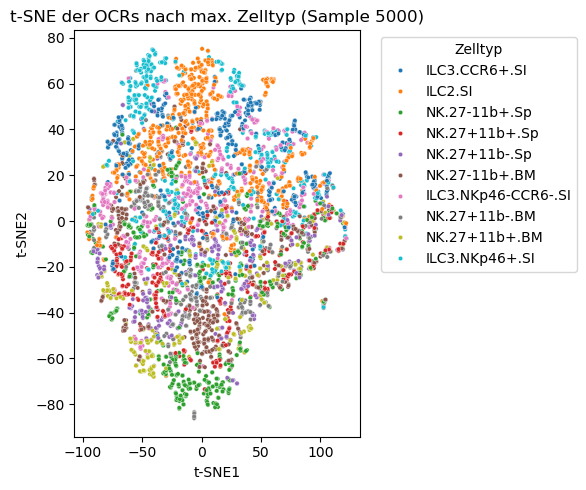

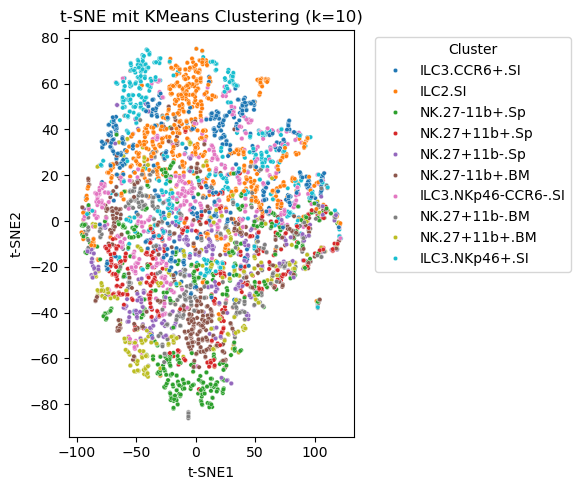

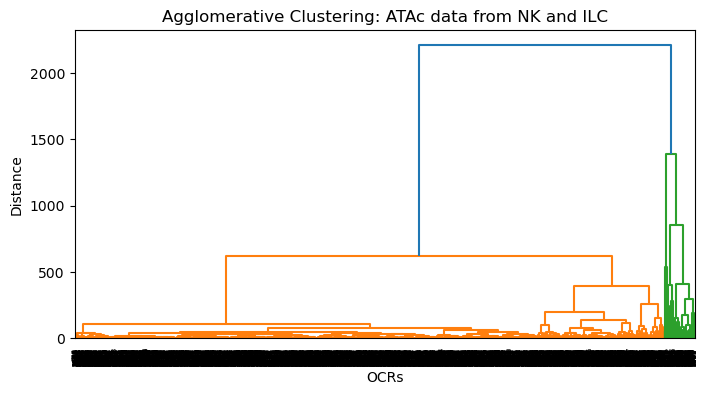

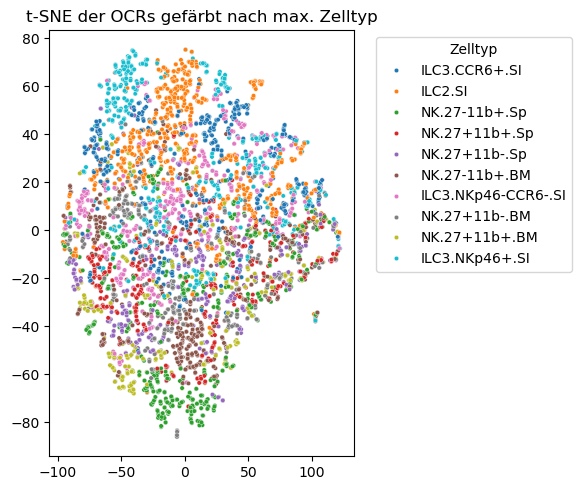

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# CSV einlesen
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', encoding='latin1')

# Zelltypen-Spalten
celltype_cols = [
    "ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI",
    "NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM",
    "NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp"
]

# OCR IDs als Index
ocr_ids = df_raw.iloc[:, 0].values
df_expr = df_raw[celltype_cols]
df_expr.index = ocr_ids
df_expr.index.name = "OCR_ID"

# Sample von 5000 OCRs
df_sample = df_expr.sample(n=5000, random_state=42)

# Maximaler Zelltyp je OCR (für Farbgebung)
max_celltypes = df_sample.idxmax(axis=1)

# PCA
pca = PCA(n_components=9)
pca_result = pca.fit_transform(df_sample)

# t-SNE
tsne = TSNE(n_components=2, perplexity=9, random_state=42)
tsne_result = tsne.fit_transform(df_sample)

# PCA Plot mit Färbung nach Zelltyp
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=max_celltypes, s=10, palette="tab10")
plt.title("PCA der OCRs nach max. Zelltyp (Sample 5000)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Zelltyp")
plt.tight_layout()
plt.show()

# t-SNE Plot mit Färbung nach Zelltyp
plt.figure(figsize=(6, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=max_celltypes, s=10, palette="tab10")
plt.title("t-SNE der OCRs nach max. Zelltyp (Sample 5000)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Zelltyp")
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans

# Anzahl der Cluster 
n_clusters = 10

# KMeans Clustering auf t-SNE-Daten
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(df_expr)

# Plot t-SNE mit KMeans Clustern
plt.figure(figsize=(6, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=max_celltypes
                , palette="tab10", s=10)
plt.title(f"t-SNE mit KMeans Clustering (k={n_clusters})")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Z = linkage(df_sample, method='ward')

# Plots dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Agglomerative Clustering: ATAc data from NK and ILC')
plt.xlabel('OCRs')
plt.ylabel('Distance')
plt.show()

#Compute correlation matrix
tsne_df = pd.DataFrame(df_sample, columns=["t-SNE1", "t-SNE2"])
tsne_df["Zelltyp"] = max_celltypes.values
#co_mtx = tsne_df.corr()
co_mtx = tsne_df[["t-SNE1", "t-SNE2"]].corr()
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_sample, x=tsne_result[:, 0], y=tsne_result[:, 1], hue=max_celltypes, palette="tab10", s=10)
plt.title("t-SNE der OCRs gefärbt nach max. Zelltyp")
plt.legend(title="Zelltyp", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Print correlation matrix
#print(co_mtx)

# Plot correlation heatmap
#sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)


# Display heatmap
#plt.show()


